In [3]:
import copy
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from utils.plot_utils import set_fontsize
from utils.binning_utils import bin_dataset_switching
from utils.hdf_utils import load_measurement_data_devices_attrs
from utils.plot_utils import plot_binned_dataset_switching
from utils.binning_utils import bin_data, find_nearest_idx, combine_arrays_irregular, \
                                average_binned_data, bin_dataset_switching

## Without Polarization Switching

In [33]:
fname = "2020_10_30.hdf"
dset_name = "1604093112 R0 F2 without RC pol switching"

devices = ()

In [34]:
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

In [35]:
pmt_channel = 1
shutter_channel = 2

pmt_data = []
shutter_data = []
for idx in range(1,len(pxie)+1):
    val = pxie[idx]
    pmt_data.append(val[:,pmt_channel])
    shutter_data.append(val[:,shutter_channel].mean() > 2e4)
pmt_data = np.asarray(pmt_data).astype(float)
shutter_data = np.asarray(shutter_data)

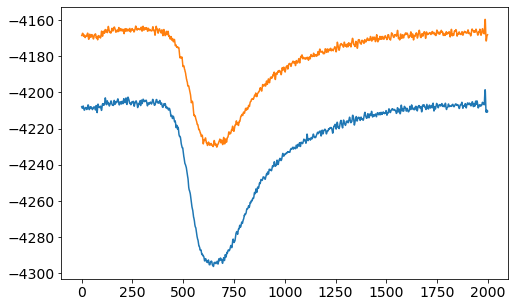

In [37]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.mean(pmt_data[::2], axis = 0), label = 'rc on')
ax.plot(np.mean(pmt_data[1::2], axis = 0), label = 'rc off')

set_fontsize(ax, 14)

In [8]:
pmt_data -= np.mean(pmt_data[:,:250], axis = 1)[:,np.newaxis]
pmt_data *= -1

In [9]:
def ratio_error(a,b,σa,σb):
    return np.sqrt((a/b)**2 * ((σa/a)**2 + (σb/b)**2))

ratio rc on/off : 1.442 +/- 0.004


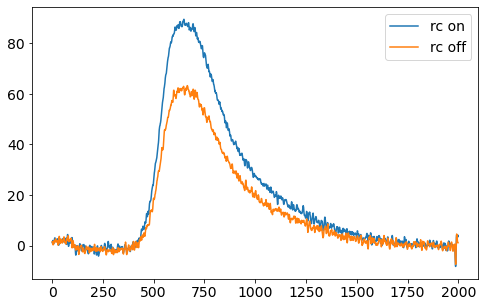

In [10]:
d_open = np.mean(pmt_data[::2], axis = 0)
d_closed = np.mean(pmt_data[1::2], axis = 0)

fig, ax = plt.subplots(figsize = (8,5))

ax.plot(d_open, label = 'rc on')
ax.plot(d_closed, label = 'rc off')
ax.legend(fontsize = 14)
set_fontsize(ax, 14)

into, intc = np.trapz(d_open), np.trapz(d_closed)
stdo, stdc = np.sqrt(np.sum((np.std(pmt_data[::2],axis=0)/np.sqrt(len(d_open)))**2)),\
             np.sqrt(np.sum((np.std(pmt_data[1::2],axis=0)/np.sqrt(len(d_open)))**2))

r = into/intc
rerr = ratio_error(into, intc, stdo, stdc)
print(f'ratio rc on/off : {r:.3f} +/- {rerr:.3f}')

ratio rc on/off : 1.442 +/- 0.029


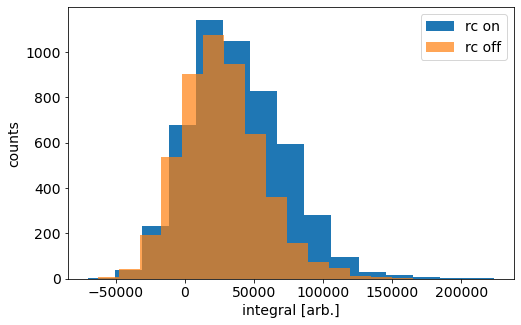

In [11]:
integrals = np.trapz(pmt_data, axis = 1)
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(integrals[::2], label = 'rc on', bins = 15)
ax.hist(integrals[1::2], alpha = 0.7, label = 'rc off', bins = 15)

ax.set_xlabel('integral [arb.]')
ax.set_ylabel('counts')
ax.legend(fontsize = 14)
set_fontsize(ax, 14)

into, intc = np.mean(integrals[::2]), np.mean(integrals[1::2])
stdo, stdc = np.std(integrals[::2])/np.sqrt(len(integrals)/2), \
             np.std(integrals[1::2])/np.sqrt(len(integrals)/2)
r = into/intc
rerr = ratio_error(into, intc, stdo, stdc)
print(f'ratio rc on/off : {r:.3f} +/- {rerr:.3f}')

## With Polarization Switching

In [38]:
dset_name = "1604094213 R0 F2 with RC pol switching"

In [39]:
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

In [40]:
pmt_channel = 1
shutter_channel = 2

pmt_data = []
shutter_data = []
for idx in range(1,len(pxie)+1):
    val = pxie[idx]
    pmt_data.append(val[:,pmt_channel])
    shutter_data.append(val[:,shutter_channel].mean() > 2e4)
pmt_data = np.asarray(pmt_data).astype(float)
shutter_data = np.asarray(shutter_data)

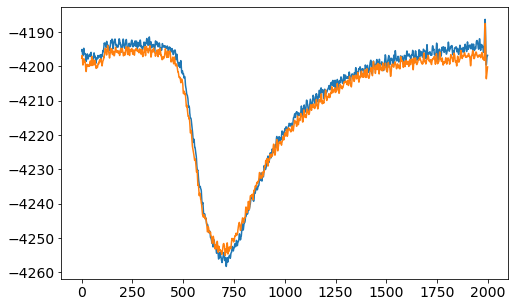

In [41]:
# first entry has shutter closed, so change to 1::2 
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.mean(pmt_data[1::2], axis = 0), label = 'rc on')
ax.plot(np.mean(pmt_data[::2], axis = 0), label = 'rc off')

set_fontsize(ax, 14)

In [25]:
pmt_data -= np.mean(pmt_data[:,:250], axis = 1)[:,np.newaxis]
pmt_data *= -1

In [26]:
def ratio_error(a,b,σa,σb):
    return np.sqrt((a/b)**2 * ((σa/a)**2 + (σb/b)**2))

ratio rc on/off : 1.043 +/- 0.004


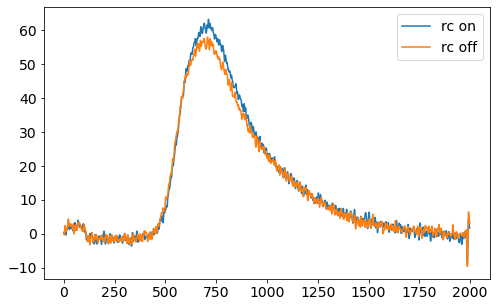

In [30]:
# first entry has shutter closed, so change to 1::2 
d_open = np.mean(pmt_data[1::2], axis = 0)
d_closed = np.mean(pmt_data[::2], axis = 0)

fig, ax = plt.subplots(figsize = (8,5))

ax.plot(d_open, label = 'rc on')
ax.plot(d_closed, label = 'rc off')
ax.legend(fontsize = 14)
set_fontsize(ax, 14)

into, intc = np.trapz(d_open), np.trapz(d_closed)
stdo, stdc = np.sqrt(np.sum((np.std(pmt_data[1::2],axis=0)/np.sqrt(len(d_open)))**2)),\
             np.sqrt(np.sum((np.std(pmt_data[::2],axis=0)/np.sqrt(len(d_open)))**2))

r = into/intc
rerr = ratio_error(into, intc, stdo, stdc)
print(f'ratio rc on/off : {r:.3f} +/- {rerr:.3f}')

ratio rc on/off : 1.043 +/- 0.024


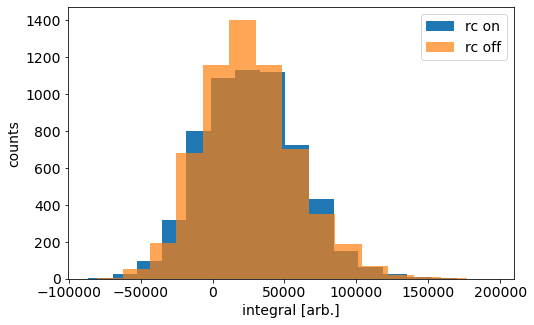

In [31]:
integrals = np.trapz(pmt_data, axis = 1)
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(integrals[1::2], label = 'rc on', bins = 15)
ax.hist(integrals[::2], alpha = 0.7, label = 'rc off', bins = 15)

ax.set_xlabel('integral [arb.]')
ax.set_ylabel('counts')
ax.legend(fontsize = 14)
set_fontsize(ax, 14)

# first entry has shutter closed, so change to 1::2 
into, intc = np.mean(integrals[1::2]), np.mean(integrals[::2])
stdo, stdc = np.std(integrals[1::2])/np.sqrt(len(integrals)/2), \
             np.std(integrals[::2])/np.sqrt(len(integrals)/2)
r = into/intc
rerr = ratio_error(into, intc, stdo, stdc)
print(f'ratio rc on/off : {r:.3f} +/- {rerr:.3f}')